# $$ \color{red}{Bengaluru\ House\ Price\ Analysis} $$
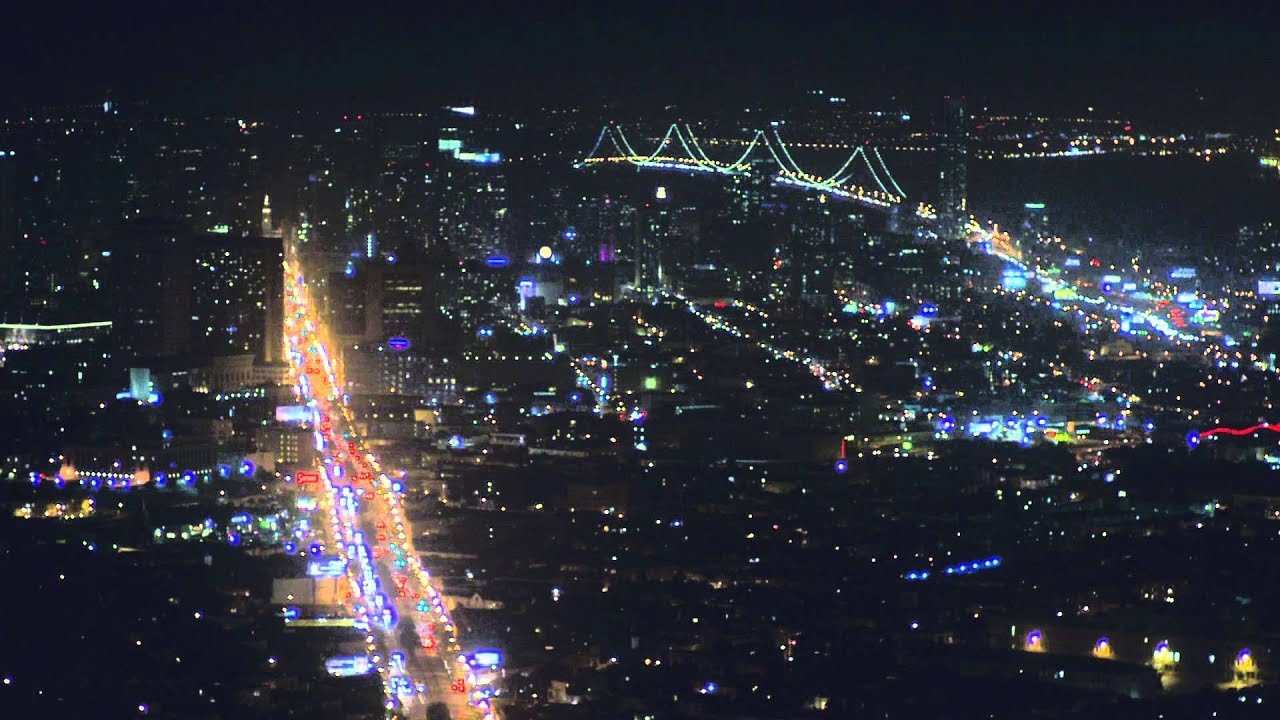

In [ ]:
#necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [ ]:
#checking for first five rows of our dataframe
df.head()

In [ ]:
print('Shape of the dataframe is: ' ,df.shape)

In [ ]:
#checking columnns
df.columns

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.isna().sum()

In [ ]:
df["size"].replace({"4 Bedroom": "4 BHK", 
                    "6 Bedroom": "6 BHK",
                   "3 Bedroom" : "3 BHK",
                   "1 Bedroom" : "1 BHK",
                   "1 RK" : "1 BHK",
                   '8 Bedroom' : '8 BHK',
                   '2 Bedroom': '2 BHK',
                   '7 Bedroom': '7 BHK',
                   '5 Bedroom' : '5 BHK',
                   '9 Bedroom': '9 BHK',
                   '10 Bedroom': '10 BHK',
                   '11 Bedroom': '11 BHK',
                   '43 Bedroom': '43 BHK',
                   '12 Bedroom': '12 BHK',
                   '18 Bedroom': '18 BHK'}, inplace=True)

In [ ]:
dict = {}
for x in list(df.columns):
    dict[x] = df[x].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Counts"]).transpose()

# $$ \color{red}{Exploratory\ Data\ Analysis} $$

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols  #categorical columns

In [ ]:
num_cols = df.select_dtypes(include = 'float64').columns
num_cols  #numerical columns

## $$ \color{green}{1.\  Univariate\  Analysis} $$

In [ ]:
sns.countplot(df.area_type,
              palette = 'Set3',
              edgecolor=sns.color_palette("Set3", 4))

In [ ]:
sns.countplot(df['size'],
              palette = 'Set3')

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6,16))

sns.set_theme(style="darkgrid")
axes[0].set_title("Bath distribution")
axes[1].set_title("Balcony distribution")
axes[2].set_title("Price distribution")

sns.boxenplot(y=df.bath,
            palette='Greens', 
            color='red',
           linewidth=3,
           ax=axes[0]);

sns.countplot(df.balcony,
              palette = 'prism',
             ax = axes[1])

sns.boxenplot(y=df.price,
            palette='viridis',
           linewidth=1,
              ax=axes[2])

plt.tight_layout(pad=2);

## $$ \color{green}{2.\  Bivariate\  Analysis} $$

In [ ]:
num_cols

In [ ]:
df.shape

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs price',
           x='bath', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='balcony vs price',
           x='balcony', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs balcony',
           x='bath', 
           y='balcony')

## $$ \color{green}{3.\  Multivariate\  Analysis} $$

In [ ]:
num_cols

In [ ]:
cat_cols

In [ ]:
plt.figure(figsize = (8,6))
plt.title('Correlation between variables')
sns.heatmap(df.corr(), fmt='.1f', annot=True, cmap= "bone_r");

# $$ \color{black}{Thankyou\ for\ Sticking\ Around\ :)} $$